# Word embeddings

*This activity has been inspired from the [Word embeddings demo](https://gist.github.com/fgiobergia/b3a20e097f9b697d0a02fb17685cfd5a) by Flavio Giobergia*

For this example, we will use the `gensim` library to manipulate word embeddings. 

In [82]:
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Download pre-trained word embedding vector from the [fastText](https://fasttext.cc/) website:

The file contains 1 million word vectors train on Wikipedia 2017, UMBC corpus and statmt.org news dataset. Be carefull, the file is large (about 650 MB).

In [73]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
!unzip -f wiki-news-300d-1M.vec.zip

--2025-05-26 00:21:36--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Résolution de dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)… 2600:9000:2117:bc00:13:6e38:acc0:93a1, 2600:9000:2117:d400:13:6e38:acc0:93a1, 2600:9000:2117:e200:13:6e38:acc0:93a1, ...
Connexion à dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|2600:9000:2117:bc00:13:6e38:acc0:93a1|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 681808098 (650M) [application/zip]
Enregistre : ‘wiki-news-300d-1M.vec.zip.4’

wiki-news-300d-1M.v 100%[===================>] 650,22M   105MB/s    ds 6,4s    

2025-05-26 00:21:43 (102 MB/s) - ‘wiki-news-300d-1M.vec.zip.4’ enregistré [681808098/681808098]

Archive:  wiki-news-300d-1M.vec.zip


Load the model into memory. This may take a while (about 4-5 min).

In [74]:
word_vectors = KeyedVectors.load_word2vec_format("wiki-news-300d-1M.vec", binary=False)



Print vocabulary size (number of words known by the model) and the first 10 words in the vocabulary:

In [83]:
print(f"Vocabulary size: {len(word_vectors.index_to_key)}")
print("Ten first words:")
for word in word_vectors.index_to_key[:10]:
    print(word)

Vocabulary size: 999994
Ten first words:
,
the
.
and
of
to
in
a
"
:


Here a *word* is an usual word like `the`, `and`... but also punctuation marks like `,`, `.` or `"`.

In [84]:
def print_word_info(word: str) -> None:
    try:
        vector = word_vectors.get_vector(word)
        print(f"Vector for the '{word}': {vector[:5]}...")
        print(f"Vector length: {len(vector)}")
    except KeyError:
        print(f"'{word}' not found in vocabulary.")

Print vector size and first coordinates for a couple of words:

In [86]:
print_word_info("simulation")
print_word_info("science")
print_word_info("material")

Vector for the 'simulation': [ 0.0257  0.1581 -0.0146  0.1005 -0.1502]...
Vector length: 300
Vector for the 'science': [-0.1314  0.1289 -0.0204 -0.113  -0.0881]...
Vector length: 300
Vector for the 'material': [-0.0141  0.0142  0.0744 -0.1313 -0.0664]...
Vector length: 300


Unfortunately, all words are not in the vocabulary:

In [94]:
print_word_info("CECAM")


'CECAM' not found in vocabulary.


For a given word, the `similar_by_word()` method returns the most similar words in the vocabulary, together with their similarity score:

In [95]:
word_vectors.similar_by_vector(word_vectors.get_vector("simulation"), topn=10)

[('simulation', 1.0),
 ('simulations', 0.8465936183929443),
 ('Simulation', 0.7849317193031311),
 ('simulator', 0.7705481052398682),
 ('simulated', 0.7198832035064697),
 ('simulators', 0.7164538502693176),
 ('simulating', 0.6637318134307861),
 ('modeling', 0.6338493824005127),
 ('scenarios', 0.6143165230751038),
 ('simulation-based', 0.6122226715087891)]

In [97]:
word_vectors.similar_by_vector(word_vectors.get_vector("learning"), topn=10)

[('learning', 0.9999999403953552),
 ('teaching', 0.7239947319030762),
 ('Learning', 0.6977978944778442),
 ('learning-', 0.6400255560874939),
 ('education', 0.6377506852149963),
 ('learner', 0.629082441329956),
 ('knowledge', 0.6162636280059814),
 ('reading', 0.6123515367507935),
 ('instruction', 0.6114665865898132),
 ('Student-centered', 0.6098930835723877)]

In [98]:
target = word_vectors.get_vector("king") - word_vectors.get_vector("man") + word_vectors.get_vector("woman")
word_vectors.similar_by_vector(target, topn=10)

[('king', 0.865509569644928),
 ('queen', 0.7673766613006592),
 ('monarch', 0.695580005645752),
 ('kings', 0.6929546594619751),
 ('princess', 0.6909604668617249),
 ('woman', 0.6528975367546082),
 ('lady', 0.6286187171936035),
 ('prince', 0.6222134232521057),
 ('kingdom', 0.6208547353744507),
 ('royal', 0.6090123653411865)]

In [80]:
countries = ["norway", "germany", "france", "italy", "greece", "portugal"]
capitals  = ["oslo", "berlin",  "paris",  "rome",  "athens", "lisbon"]

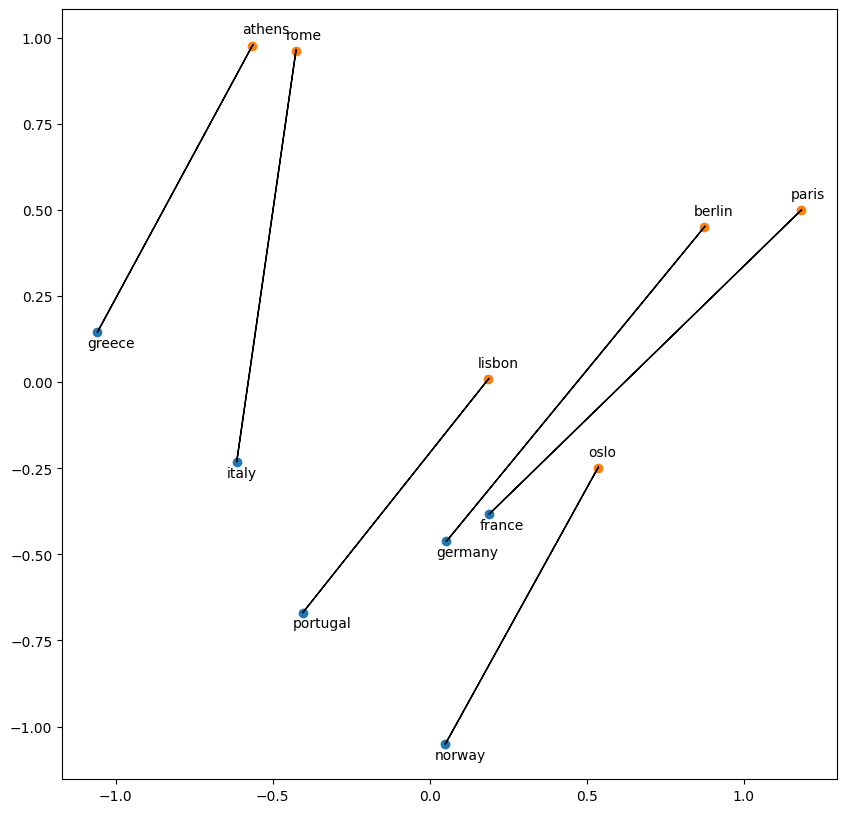

In [81]:
def plot_pairs(wv, word_list_1, word_list_2):
    wv_1 = [ wv.get_vector(word) for word in word_list_1 ]
    wv_2 = [ wv.get_vector(word) for word in word_list_2 ]
    
    pca = PCA(2)
    wv_pca = pca.fit_transform(wv_1 + wv_2)
    
    wv_pca_1 = wv_pca[:len(wv_1)]
    wv_pca_2 = wv_pca[len(wv_1):]
    
    plt.figure(figsize=(10,10))
    plt.scatter(wv_pca_1[:,0], wv_pca_1[:,1])
    plt.scatter(wv_pca_2[:,0], wv_pca_2[:,1])
    
    for i, (word_1, word_2) in enumerate(zip(word_list_1, word_list_2)):
        plt.annotate(word_1, wv_pca_1[i], xytext=(-10,-15), textcoords="offset pixels")
        plt.annotate(word_2, wv_pca_2[i], xytext=(-10,12), textcoords="offset pixels")
        
    for i in range(len(wv_pca_1)):
        plt.arrow(wv_pca_1[i,0], wv_pca_1[i,1], wv_pca_2[i,0]-wv_pca_1[i,0], wv_pca_2[i,1]-wv_pca_1[i,1], shape="left")

plot_pairs(word_vectors, countries, capitals)